<a href="https://colab.research.google.com/github/Oec8cek/Ai-Understanding/blob/main/pr_lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA & k-NN

Table of contents

✔ Chapter 1. PCA

Chapter 2. k-NN

To install further python libraries, type

`!pip install --target=$my_path [LIBRARY_NAME]`

# Chapter 1-1. Implement from scratch



*   data: sklearn iris dataset

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris['data']
y = iris['target']

n_samples, n_features = X.shape

print('Number of samples:', n_samples)
print('Number of features:', n_features)

Number of samples: 150
Number of features: 4


1. Normalize the data

In [ ]:
def mean(x): # np.mean(X, axis = 0)  
    return sum(x)/len(x)  

def std(x): # np.std(X, axis = 0)
    return (sum((i - mean(x))**2 for i in x)/len(x))**0.5

def Standardize_data(X):
    return (X - mean(X))/std(X)

X_std = Standardize_data(X)

2. Compute the covariance matrix

In [ ]:
def covariance(x): 
    return (x.T @ x)/(x.shape[0]-1)

cov_mat = covariance(X_std) # np.cov(X_std.T)

3. Find the eigen vectors and eigen values of the covariance matrix

In [ ]:
from numpy.linalg import eig

# Eigendecomposition of covariance matrix
eig_vals, eig_vecs = eig(cov_mat) 

# Adjusting the eigenvectors (loadings) that are largest in absolute value to be positive
max_abs_idx = np.argmax(np.abs(eig_vecs), axis=0)
signs = np.sign(eig_vecs[max_abs_idx, range(eig_vecs.shape[0])])
eig_vecs = eig_vecs*signs[np.newaxis,:]
eig_vecs = eig_vecs.T

print('Eigenvalues \n', eig_vals)
print('Eigenvectors \n', eig_vecs)

4. Sort eigen values and vectors in descending order (to pick top K principal components

In [ ]:
# We first make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[i,:]) for i in range(len(eig_vals))]

# Then, we sort the tuples from the highest to the lowest based on eigenvalues magnitude
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# For further usage
eig_vals_sorted = np.array([x[0] for x in eig_pairs])
eig_vecs_sorted = np.array([x[1] for x in eig_pairs])

print(eig_pairs)

5. Choose k principal components (k < number of features)

In [ ]:
k = 2
W = eig_vecs_sorted[:k, :]

6. Compute variance according to k

In [ ]:
eig_vals_total = sum(eig_vals)
explained_variance = [(i / eig_vals_total)*100 for i in eig_vals_sorted]
explained_variance = np.round(explained_variance, 2)

print('Explained variance: {}'.format(explained_variance))

plt.xticks(np.arange(1,n_features+1))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');
plt.show()

7. Project the data

In [ ]:
X_proj = X_std.dot(W.T)

print(X_proj.shape)

plt.scatter(X_proj[:, 0], X_proj[:, 1], c = y)
plt.xlabel('PC1'); plt.xticks([])
plt.ylabel('PC2'); plt.yticks([])
plt.title('2 components')
plt.show()


Put all together in class PCA

In [ ]:
import numpy as np
class PCA:
    
    def __init__(self, n_components):
        self.n_components = n_components   
        
    def fit(self, X):
        # Standardize data 
        X = X.copy()
        self.mean = np.mean(X, axis = 0)
        self.scale = np.std(X, axis = 0)
        X_std = (X - self.mean) / self.scale
        
        # compute covariance matrix       
        cov_mat = np.cov(X_std.T)
        # Eigendecomposition of covariance matrix     
        eig_vals, eig_vecs = np.linalg.eig(cov_mat) 
        
        # Adjusting the eigenvectors that are largest in absolute value to be positive    
        max_abs_idx = np.argmax(np.abs(eig_vecs), axis=0)
        signs = np.sign(eig_vecs[max_abs_idx, range(eig_vecs.shape[0])])
        eig_vecs = eig_vecs*signs[np.newaxis,:]
        eig_vecs = eig_vecs.T
       
        eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[i,:]) for i in range(len(eig_vals))]
        eig_pairs.sort(key=lambda x: x[0], reverse=True)
        eig_vals_sorted = np.array([x[0] for x in eig_pairs])
        eig_vecs_sorted = np.array([x[1] for x in eig_pairs])
        
        self.components = eig_vecs_sorted[:self.n_components,:]
        
        # Explained variance ratio
        self.explained_variance_ratio = [i/np.sum(eig_vals) for i in eig_vals_sorted[:self.n_components]]

        return self

    def transform(self, X):
        X = X.copy()
        X_std = (X - self.mean) / self.scale
        X_proj = X_std.dot(self.components.T)
        
        return X_proj
# ---------------------------------------------------------
my_pca = PCA(n_components = 2).fit(X)

print('Components:\n', my_pca.components)
print('Explained variance ratio from scratch:\n', my_pca.explained_variance_ratio)
X_proj = my_pca.transform(X)
print('Transformed data shape from scratch:', X_proj.shape)

Components:
 [[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]]
Explained variance ratio from scratch:
 [0.7296244541329989, 0.22850761786701754]
Transformed data shape from scratch: (150, 2)


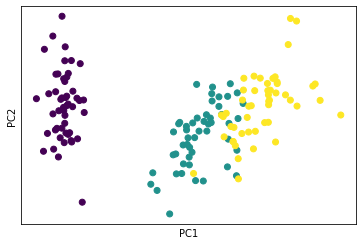

In [ ]:
plt.scatter(X_proj[:, 0], X_proj[:, 1], c = y)
plt.xlabel('PC1'); plt.xticks([])
plt.ylabel('PC2'); plt.yticks([])
plt.show()

# Chapter 1-2. Use scikit-learn library


Components:
 [[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]]
Explained variance ratio:
 [0.72962445 0.22850762]
Transformed data shape: (150, 2)


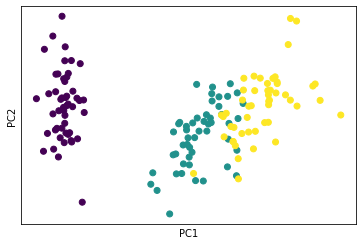

In [ ]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
X_std = StandardScaler().fit_transform(X)

from sklearn.decomposition import PCA
pca = PCA(n_components = 2).fit(X_std)

print('Components:\n', pca.components_)
print('Explained variance ratio:\n', pca.explained_variance_ratio_)

X_pca = pca.transform(X_std) # Apply dimensionality reduction to X.
print('Transformed data shape:', X_pca.shape)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c = y)
plt.xlabel('PC1'); plt.xticks([])
plt.ylabel('PC2'); plt.yticks([])
plt.show()

Table of contents

Chapter 1.  PCA

✔ Chapter 2. k-NN

# Chapter 2-1. Implement from scratch


load the data


*   sklearn iris dataset



In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Unpack the iris dataset, from UCI Machine Learning Repository
iris = datasets.load_iris()
X = iris['data']
y = iris['target']
# Preprocess data
X = StandardScaler().fit_transform(X)
# Split data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

1. Training does nothing. What we need is just training set

In [ ]:
def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

2. Predict the label using the testing set

In [ ]:
def euclidean(point, data):
    # Euclidean distance between points a & data
    return np.sqrt(np.sum((point - data)**2, axis=1))

def most_common(lst):
    return max(set(lst), key=lst.count)
    
def predict(self, X_test):
    neighbors = []
    for x in X_test:
        # compute the euclidean distance
        distances = self.euclidean(x, self.X_train)
        # sort based on the distance
        y_sorted = [y for _, y in sorted(zip(distances, self.y_train))]
        # pick k nearest neighbors 
        neighbors.append(y_sorted[:self.k])
    return list(map(most_common, neighbors)) # among k nearest neighbors, pick the majority label

3. Compute the accuracy based on predicted labels

In [ ]:
# compute the accuracy of the classifier
def evaluate(self, X_test, y_test):
    y_pred = self.predict(X_test)
    accuracy = sum(y_pred == y_test) / len(y_test)
    return accuracy

Then, let's put everything into KNeighborsClassifier class

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
def most_common(lst):
    return max(set(lst), key=lst.count)

def euclidean(point, data):
    # Euclidean distance between points a & data
    return np.sqrt(np.sum((point - data)**2, axis=1))

class KNeighborsClassifier:
    def __init__(self, k=5, dist_metric=euclidean):
        self.k = k
        self.dist_metric = dist_metric

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        neighbors = []
        for x in X_test:
            distances = self.dist_metric(x, self.X_train)
            y_sorted = [y for _, y in sorted(zip(distances, self.y_train))]
            neighbors.append(y_sorted[:self.k])
        return list(map(most_common, neighbors))
        
    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        accuracy = sum(y_pred == y_test) / len(y_test)
        return accuracy

Load the dataset and run k-NN on it

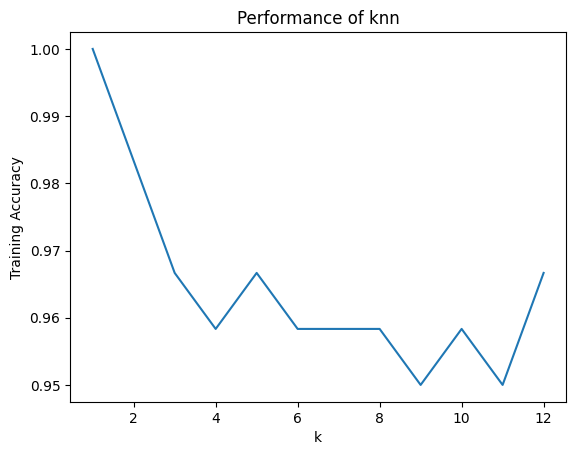

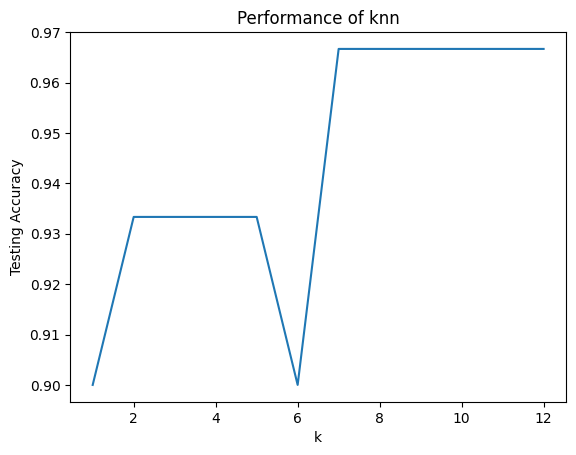

In [ ]:
# Unpack the iris dataset, from UCI Machine Learning Repository
iris = datasets.load_iris()
X = iris['data']
y = iris['target']
# Split data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Preprocess data
ss = StandardScaler().fit(X_train)
X_train, X_test = ss.transform(X_train), ss.transform(X_test)
# Test knn model across varying ks
accuracies_test = []
accuracies_train = []
ks = range(1, 13)
for k in ks:
    knn = KNeighborsClassifier(k=k)
    knn.fit(X_train, y_train)
    accuracy_test = knn.evaluate(X_test, y_test)
    accuracies_test.append(accuracy_test)
    accuracy_train = knn.evaluate(X_train, y_train)
    accuracies_train.append(accuracy_train)
# Visualize accuracy vs. k
fig, ax = plt.subplots()
ax.plot(ks, accuracies_train)
ax.set(xlabel="k",
       ylabel="Training Accuracy",
       title="Performance of knn")
plt.show()

fig, ax = plt.subplots()
ax.plot(ks, accuracies_test)
ax.set(xlabel="k",
       ylabel="Testing Accuracy",
       title="Performance of knn")
plt.show()


# Chapter 2-2. Use scikit-learn library


In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
accuracies_test=[]
accuracies_train=[]
for k in range(1,13):
  #by default, metric is an euclidean distance 
  # Refer to https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
  classifier = KNeighborsClassifier(n_neighbors = k)
  classifier.fit(X_train, y_train)
  accuracies_train.append(classifier.score(X_train, y_train))
  accuracies_test.append(classifier.score(X_test, y_test))

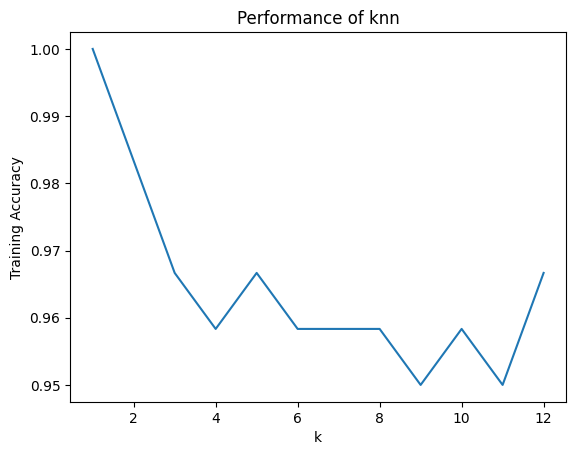

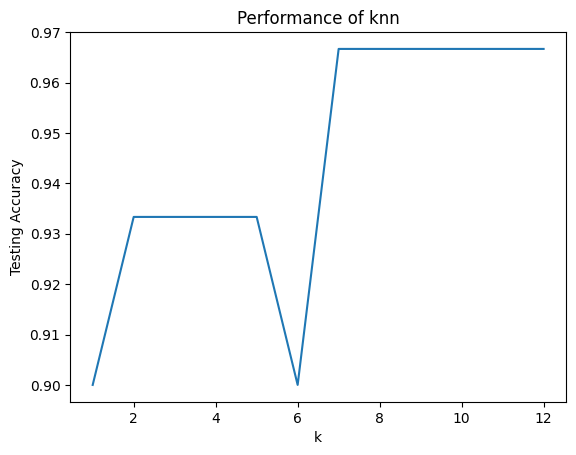

In [ ]:
# Visualize accuracy vs. k
fig, ax = plt.subplots()
ax.plot(ks, accuracies_train)
ax.set(xlabel="k",
       ylabel="Training Accuracy",
       title="Performance of knn")
plt.show()

fig, ax = plt.subplots()
ax.plot(ks, accuracies_test)
ax.set(xlabel="k",
       ylabel="Testing Accuracy",
       title="Performance of knn")
plt.show()